## Exploratory Data Analysis using Pandas
<br>
College Assignment

In [0]:
# Importing required libraries
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from scipy.stats import iqr
import seaborn as sb

In [2]:
## Reading Data
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", 
                 names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation', 'relationship', 
                          'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income_level'])

## Making the 'object' type variables into 'Categorical' type variables
object_cols = df.select_dtypes('object').columns
for i in object_cols:
    df[i] = pd.Categorical(df[i])
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Q-1. Difference between hypothesis testing and exploratory data analysis
- In Exploratory data analysis, we study the underlying data by doing some manipulations, slicing and dicing of data, visualisation of attributes, using select and grouby operations to generate some insights into the data at hand and subsequently develop some reasonble assumptions about the data, what pattern it follows and use those assumptions to further our Data Analysis process.
- Hypothesis testing is the process of taking the assumptions about data developed from EDA and test whether they are really valid or not. Hypothesis testing involves tests on Data Statistics (like mean, median, variance, etc) of the underlying attribute, tests on data models as a whole(like which statistical distribution the attribute of data follows), etc.
<br><br>
- In general, EDA gives us the hypothesis (assumptions) to test and Hypothesis testing checks whether it's significant or not.

#### Q-2. Goal of Exploratory Data Analysis is to build analytical models
False <br>
The Goal of EDA is to provide an overview of the Data and find out what characteristics of data seem to be significant enough so that it can roughly show how the data looks from a bird's eye view. Building analytical models involves diving deep into the attributes and finding out what attributes explain the variation in data and using those for prediction, interpretation, etc.<br>
Also, without carrying out EDA, building analytical models might result in non-sensical outcomes.

#### Q-3. Addressing missing data.
- The question statement is true, with a few terms and conditions explained below.
- To deal with missing data, there is no one standard technique. A lot of decisions are based on context. Usually, a missing value in a numerical attribute is addressed with putting the mean of all other values in the missing value. Similarly, mode is used when it's a categorical variable. There are cases when doing this work well, e.g. Data of sales of an item (of different brands) might have a missing value of product price, then assuming that the number of observations are large enough (say >50),  it is safe to replace the missing price by mean of all other prices.
- Using mean in instances like where the attributes have significant no. of outliers or when the values of the attributes are varying too much, might be a bad idea. So, in general, it makes sense to fill the missing entries using some measures of central tendency, but focus should be on using domain knowledge to check whether it makes sense or not.
- Otherwise, if the dataset is large enough, and it's not sensitive to exclusion of a single row, then the row containing the missing value can be ignored but this should be the last resort.

#### Q-4. Types and summary statistics associated with each type of attributes.

In [0]:
df.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education_num        int64
marital_status    category
occupation        category
relationship      category
race              category
sex               category
capital_gain         int64
capital_loss         int64
hours_per_week       int64
native_country    category
income_level      category
dtype: object

In [0]:
## Summary statistics of continuous (numerical) attributes
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [0]:
## Summary statistics of Categorical attributes.
df.select_dtypes('category').describe()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income_level
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


#### Q-5. Identifying correlation, it's importance and impacts on certain Statistical models.
There are two ways to examine correlation between numerical variables. One is plotting both numerical variables and judging whether they correlate or not. A better way is to calculate the correlation coefficient (which lies from -1 to 1). A 1 or -1 value denotes strong positive or negative correlation respectively. Below is the command that calculates correlation coefficient between all pairs of numerical variables.

In [0]:
df.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


- Identifying variables that correlate is extremely important for carrying out Regression Analysis. This is so because if the Regression model contains a pair of explanatory variables that correlate, then this arises a few difficulties in interpretation of results of model (interpreting coefficients) as well as violates the assumptions that explanatory variables are independent.
- Hence, if two variables are highly correlated, then it is advisable to not include both variables simultaneously in the model. Technically, the problem is that since both variables are correlated, it is impossible to distinguish the variation in response variable whether it is explained by one or the other correlated indepenednt variable. i.e. Correlation does not really affect the prediction power of the model, but it has a negative impact on Interpretation power of the model.

#### Q-6. Why perform Data Analysis while we can directly perform the end goal of building a model ?
This is a bad idea on multitude of reasons.
- Withou EDA, we don't get insights into irregularities that might be present in our data that could adversely affect the model if we don't address them. e.g. Missing data, values that don't comprise to standard limits of attributes (extreme or false values), data type error (e.g. value might be in text format instead of integer), in general any sort of noise. EDA detects these and we take care of this, then proceed to building a model.
- Without finding correlations between numerical attributes, directly building a model results in the Weak interpretation power of the model as mentioned in last answer, also correlation gives us interesting observations in relation to what variables might be related to one another and this could actually provide us a Hypothesis or an assumption to test / build a model on.
- Also, a lot of specifics go into EDA when performed keeping the domain knowledge in mind, hence, before starting to build a model, it is important to observe the characterisitcs of the data by performing EDA so that the model is much more than just a mathematical function.

#### Q-7. How to test independence of two categorical variables and using which statistical test ?
Chi-square test is used to test independence of two categorical variables.
- The theory involved is that, we make an m x n table of frequencies of the particular categories of both variables (having m and n categories respectively).
- Then we make another same dimensional table using expected frequencies. This is done by assuming that both variables are independent (which is the Null hypothesis of Chi-Square test), and using simple probability knowledge for two independent events, say A and B, that P(A and B) = P(A).P(B).
- After getting the expected frequencies (say fe) and we have the original frequencies (fo), then the Chi-Square statistic is the *Summation*\[(fo - fe)^2 / fe\], a p-value is then calculated and if it is less than 0.05 (could be less or more depending on sensitivity of test), then we say that both categorical variables are not independent.

#### Q-8. What are tools to determine documentation about the attributes in dataset and how dataset was generated ?
- Generally, we go to the origin website of the dataset, or the database from where the dataset came and look into it to read the documentation about the dataset which includes brief explanation of attributes, what the dataset is about, where did the database got the dataset from and when, etc.
- The MetaData repository usually contains information like this, so we can look into it to find the answers.
- Master Data Management tools also often carry information about data and how it was genereated.

#### Q-9. Discretize the age and education_num attributes using Freedman-Diaconis rule for bin width.
The Freedman-Diaconis rule for bin width states that for an attribute x, Bin Width = 2 * \[IQR(x) / (n)^1/3\] <br>
So the no. of bins are \[max(x) - min(x)\] / bin width <br>
Below is the code to discretize both attributes.

In [0]:
n_cube_root = pow(len(df['age']),1/3)
age_binwidth = 2 * iqr(df['age']) / n_cube_root
edu_binwidth = 2 * iqr(df['education_num']) / n_cube_root
## Number of bins calculation
nbins_age = (max(df['age']) - min(df['age'])) / age_binwidth
nbins_edu = (max(df['education_num']) - min(df['education_num'])) / edu_binwidth

## Discretizing the attributes.
df['binned_age'] = pd.cut(df['age'], nbins_age)
df['binned_education_num'] = pd.cut(df['education_num'], nbins_edu)
## I have defined new discretized variables instead of replacing original by new ones
## because further in the analysis those will be needed.
df[['binned_age','binned_education_num']].head() ## Discretized attributes

,binned_age,binned_education_num
0,"(38.397, 39.655]","(12.962, 13.152]"
1,"(49.724, 50.983]","(12.962, 13.152]"
2,"(37.138, 38.397]","(8.975, 9.165]"
3,"(52.241, 53.5]","(6.886, 7.076]"
4,"(27.069, 28.328]","(12.962, 13.152]"


In [0]:
## From the above code, the no. of bins of age and education_num are::
print("Number of bins of age attribute is", int(nbins_age), "and number of bins of education_num attribute is", int(nbins_edu))

Number of bins of age attribute is 58 and number of bins of education_num attribute is 79


#### Q-10. Age histogram of people who earn more than 50K.

(array([ 177., 1068., 1843., 1971., 1480.,  847.,  321.,   94.,   29.,
          11.]),
 array([19. , 26.1, 33.2, 40.3, 47.4, 54.5, 61.6, 68.7, 75.8, 82.9, 90. ]),
 <a list of 10 Patch objects>)

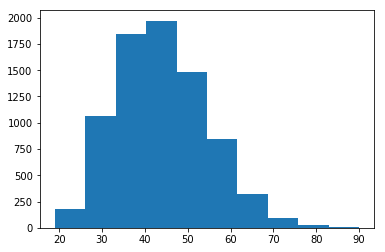

In [0]:
df1 = df[df['income_level'] == ' >50K']
plt.hist(x = df1['age'])

#### Q-11. Proportion of males and females in the group that earns more than 50K

In [0]:
## df1 is the dataframe of all those who earn more than 50K.
## Proportion of males who earn more than 50K. 
prop_males = len(df1[df1['sex'] == ' Male']['sex']) / len(df1['sex'])
prop_females = 1 - prop_males ## We can do this since there are only two categories in sex, viz. Male and Female
print("Among the people with income more than 50K, Proportion of males is", prop_males,
      "and proportion of females is", prop_females)

Among the people with income more than 50K, Proportion of males is 0.8496365259533223 and proportion of females is 0.15036347404667771


#### Q-12. Investigate whether gender and income are independent using Chi-Square test.
First we build a contingency table of Gender and Income level. Then use it to perform Chi-Square test and calculate p-value. In the output of Chi-Square test function, first value is the Chi-Square test Statistic, second value is the p-value and third value has a 2-D array which is the table of expected frequencies.

In [0]:
contingency_table = pd.crosstab(df['sex'], df['income_level'], margins = True)
contingency_table

income_level,<=50K,>50K,All
sex,,,
Male,15128,6662,21790
Female,9592,1179,10771
All,24720,7841,32561


In [0]:
chi2_contingency(contingency_table)

(1518.8868199570725,
 0.0,
 4,
 array([[16542.75974325,  5247.24025675, 21790.        ],
        [ 8177.24025675,  2593.75974325, 10771.        ],
        [24720.        ,  7841.        , 32561.        ]]))

The above output gives us a p-value of zero. This is understandable since proportion of males who earn more than 50K is significantly larger than proportion of females who earn more than 50K. <br>
Hence, We conclude that Gender and Income levels are dependent on each other. i.e. They are associated.
The dataset is very large and hence even a small difference in proportions (like 3-4%) might result in p-value almost 0. There is nothing wrong in it.

#### Q-13. Subset numerical variables of dataframe and plot a scatter plot matrix for all such pairs.

In [0]:
df_numerical = df.select_dtypes('int64')
df_numerical.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


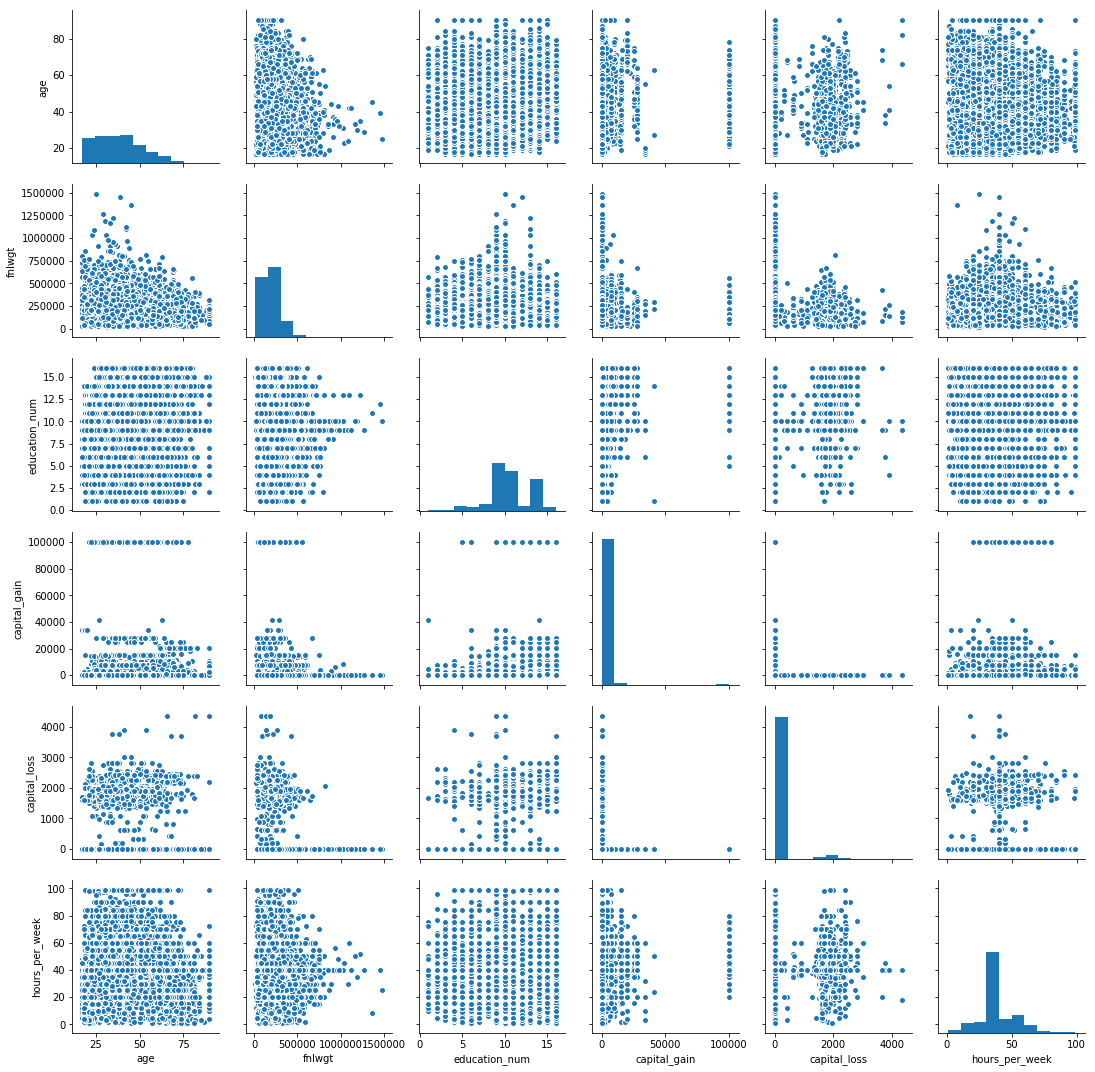

In [0]:
g = sb.pairplot(df_numerical)
print(g)
## Below is the scatter matrix for each numerical variable in the dataset

#### Q-14. Noisy data presence in the dataset
For numerical attributes, we'll check if there are any missing values or not, and we'll also check the summary statistics to find out if there are any values that violate the range of possible values for an attribute. <br>
And for caegorical attributes, we'll check is there any missing values or not, and we'll examine each and every unique categories, if those make sense or not, and if they don't, then how many such observations are there.

In [0]:
## Attributes missing values
def missing_value(attr):
    return (sum(df[attr].isnull()) / n)
n = len(df['age'])
cols = df.columns
for i in cols:
    print("Attribute",i,"has", missing_value(i),"proportion of missing values")

Attribute age has 0.0 proportion of missing values
Attribute workclass has 0.0 proportion of missing values
Attribute fnlwgt has 0.0 proportion of missing values
Attribute education has 0.0 proportion of missing values
Attribute education_num has 0.0 proportion of missing values
Attribute marital_status has 0.0 proportion of missing values
Attribute occupation has 0.0 proportion of missing values
Attribute relationship has 0.0 proportion of missing values
Attribute race has 0.0 proportion of missing values
Attribute sex has 0.0 proportion of missing values
Attribute capital_gain has 0.0 proportion of missing values
Attribute capital_loss has 0.0 proportion of missing values
Attribute hours_per_week has 0.0 proportion of missing values
Attribute native_country has 0.0 proportion of missing values
Attribute income_level has 0.0 proportion of missing values
Attribute binned_age has 0.0 proportion of missing values
Attribute binned_education_num has 0.0 proportion of missing values


In [0]:
## The above analysis shows that there are no 'NaN' values in the dataset.
## we will now examine summary statistics of numerical attributes.
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In the above summary, every attributes seem to behave nicely, except the capital gain, capital loss and hours per week attributes, where the maximum values seem to be extremey large, but still they are possible, so we cannot categorise those values into noisy data, but maybe they are outliers which we will check in next question. <br><br>
Now we will examine the categories of categorical data.

In [0]:
category_cols = df.select_dtypes('category').columns
for i in category_cols:
    print("\n\n",i, ":", df[i].unique())



 workclass : [State-gov, Self-emp-not-inc, Private, Federal-gov, Local-gov, ?, Self-emp-inc, Without-pay, Never-worked]
Categories (9, object): [State-gov, Self-emp-not-inc, Private, Federal-gov, ..., ?, Self-emp-inc, Without-pay, Never-worked]


 education : [Bachelors, HS-grad, 11th, Masters, 9th, ..., 5th-6th, 10th, 1st-4th, Preschool, 12th]
Length: 16
Categories (16, object): [Bachelors, HS-grad, 11th, Masters, ..., 10th, 1st-4th, Preschool, 12th]


 marital_status : [Never-married, Married-civ-spouse, Divorced, Married-spouse-absent, Separated, Married-AF-spouse, Widowed]
Categories (7, object): [Never-married, Married-civ-spouse, Divorced, Married-spouse-absent, Separated, Married-AF-spouse, Widowed]


 occupation : [Adm-clerical, Exec-managerial, Handlers-cleaners, Prof-specialty, Other-service, ..., Tech-support, ?, Protective-serv, Armed-Forces, Priv-house-serv]
Length: 15
Categories (15, object): [Adm-clerical, Exec-managerial, Handlers-cleaners, Prof-specialty, ..., ?, Pro

The above analysis shows us that there are categories with '?' as values in 3 attributes which are *workclass, occupation* and *native_country*.
We will now find out how many such '?' values, which are actually missing values are there.

In [0]:
work = sum(df['workclass'] == ' ?')
occu = sum(df['occupation'] == ' ?')
native = sum(df['native_country'] == ' ?')
print("Missing values in work are",work)
print("Missing values in occupation are",occu)
print("Missing values in native countries are",native)

Missing values in work are 1836
Missing values in occupation are 1843
Missing values in native countries are 583


Therefore, 3 attributes, *workclass, occupation* and *native_country* have missing values which means they are noisy attributes.

#### Q-15. Interquartile Range and its use to detect outliers.
- Quartiles are 25th and 75th percentiles of the data. i.e. Upon ordering the data in increasing order, the obseravation that lies at the 25th percentile is called the lower quartile and the 75th percentile is called the upper quartile.
- The Interquartile range (IQR) is the difference (upper quartile - lower quartile).
- To determine an outlier, it is general practice that observations lying farther than 1.5 times IQR are determined as the outliers.<br><br>
Below are box plots of numerical attributes in the data that help us roughly *spot* the outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x1168a62d668>,
 'caps': [<matplotlib.lines.Line2D at 0x1168a62deb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1168a62d518>],
 'medians': [<matplotlib.lines.Line2D at 0x1168a637748>],
 'fliers': [<matplotlib.lines.Line2D at 0x1168a637b70>],
 'means': []}

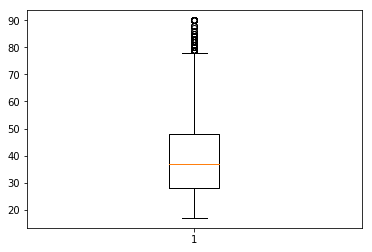

In [0]:
## Box-plot of 'age' attribute
plt.boxplot(df['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1168a6c5400>,
 'caps': [<matplotlib.lines.Line2D at 0x1168a6c5cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1168a6c52b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1168a6cd550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1168a6cd978>],
 'means': []}

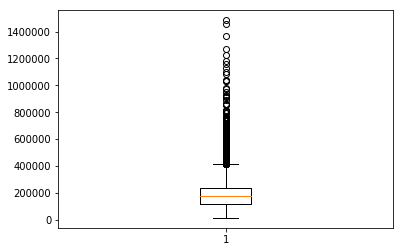

In [0]:
## Box-plot of 'fnlwgt' attribute
plt.boxplot(df['fnlwgt'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1168a0dc160>,
 'caps': [<matplotlib.lines.Line2D at 0x1168a0dca20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1168a0d3fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1168a0e52b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1168a0e56d8>],
 'means': []}

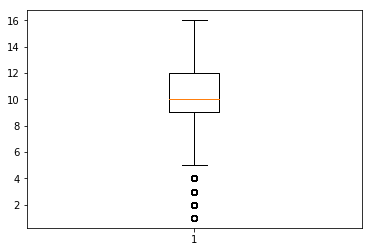

In [0]:
## Box-plot of 'education_num' attribute
plt.boxplot(df['education_num'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1168a131cc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1168a13b5c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1168a131b70>],
 'medians': [<matplotlib.lines.Line2D at 0x1168a13be10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1168a143278>],
 'means': []}

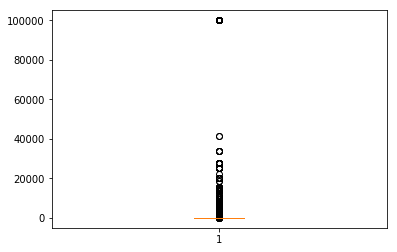

In [0]:
## Box-plot of 'capital_gain' attribute
plt.boxplot(df['capital_gain'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1168a193048>,
 'caps': [<matplotlib.lines.Line2D at 0x1168a193908>,
 'boxes': [<matplotlib.lines.Line2D at 0x1168a18beb8>],
 'medians': [<matplotlib.lines.Line2D at 0x1168a19b198>],
 'fliers': [<matplotlib.lines.Line2D at 0x1168a19b5c0>],
 'means': []}

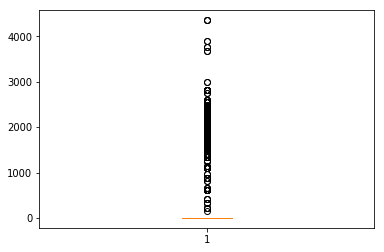

In [0]:
## Box-plot of 'capital_loss' attribute
plt.boxplot(df['capital_loss'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1168a1e0f28>,
 'caps': [<matplotlib.lines.Line2D at 0x1168a1ea828>,
 'boxes': [<matplotlib.lines.Line2D at 0x1168a1e0dd8>],
 'medians': [<matplotlib.lines.Line2D at 0x1168a1f20b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1168a1f24e0>],
 'means': []}

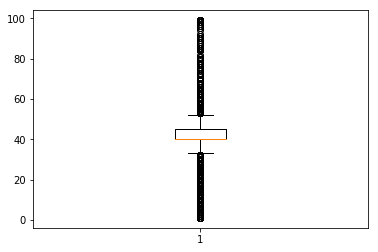

In [0]:
## Box-plot of 'hours_per_week' attribute
plt.boxplot(df['hours_per_week'])

From the above box-plots, it is apparent that the attributes *fnlwgt, capital_gain, capital_loss* and *hours_per_week* have quite a lot of outliers.

### The End